In [8]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [9]:
df_a = pd.read_csv("../../../src/datasets/1_india_disability.csv")
df_a.head()

,State Code,Area Name,Total/ Rural/Urban,Disability,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
0,0,INDIA,Total,Total,Total,26814994,14988593,11826401,6982009,5464857,1517152,17070608,7915768,9154840
1,0,INDIA,Total,Total,0-14,5572336,3073214,2499122,100779,61870,38909,5344297,2942702,2401595
2,0,INDIA,Total,Total,15-59,15728243,9125226,6603017,5808809,4559220,1249589,7785245,3317990,4467255
3,0,INDIA,Total,Total,60+,5376619,2713995,2662624,1036384,816764,219620,3854887,1614909,2239978
4,0,INDIA,Total,Total,Age not stated,137796,76158,61638,36037,27003,9034,86179,40167,46012


In [10]:
print("Area Type: ", df_a["Total/ Rural/Urban"].unique())
print("Disability Type: ", df_a["Disability"].unique())

print("Any other disability count: ", df_a["Disability"].value_counts())
print("----------------------------------------------------------")
print("Total value counts")
print(df_a.count())

Area Type:  ['Total' 'Rural' 'Urban']
Disability Type:  ['Total' 'In-Seeing' 'In-Hearing' 'In-Speech' 'In-Movement'
 'Mental-Retardation' 'Mental-Illness' 'Any-Other' 'Multiple-Disability']
Any other disability count:  Disability
Total                  540
In-Seeing              540
In-Hearing             540
In-Speech              540
In-Movement            540
Mental-Retardation     540
Mental-Illness         540
Any-Other              540
Multiple-Disability    540
Name: count, dtype: int64
----------------------------------------------------------
Total value counts
State Code                             4860
Area Name                              4860
Total/ Rural/Urban                     4860
Disability                             4860
Age-group                              4860
Total disabled population - Persons    4860
Total disabled population - Males      4860
Total disabled population - Females    4860
Main worker - Persons                  4860
Main worker - Males        

In [11]:
#removing redundant rows
data_a = df_a[(df_a["Area Name"]!="INDIA")&(df_a["Disability"]!="Total") & (df_a["Area Name"]!="Total") & (df_a["Total/ Rural/Urban"]!="Total") & (df_a["Age-group"]!="Total")]
data_a.count()


State Code                             2240
Area Name                              2240
Total/ Rural/Urban                     2240
Disability                             2240
Age-group                              2240
Total disabled population - Persons    2240
Total disabled population - Males      2240
Total disabled population - Females    2240
Main worker - Persons                  2240
Main worker - Males                    2240
Main worker - Females                  2240
Non-worker - Persons                   2240
Non-worker - Males                     2240
Non-worker - Females                   2240
dtype: int64

In [12]:
print("Disability Type: ", ", ".join(data_a["Disability"].unique()))
print("Area Type: ", data_a["Total/ Rural/Urban"].unique())
print("Age Group: ", data_a["Age-group"].unique())

Disability Type:  In-Seeing, In-Hearing, In-Speech, In-Movement, Mental-Retardation, Mental-Illness, Any-Other, Multiple-Disability
Area Type:  ['Rural' 'Urban']
Age Group:  ['0-14' '15-59' '60+' 'Age not stated']


In [13]:
# normalizing names
data_a["Area Name"] = df_a["Area Name"].str.extract(r"State - (.+) \(\d+\)", expand=False)
data_a["Area Name"].unique()

array(['JAMMU & KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'CHANDIGARH',
       'UTTARAKHAND', 'HARYANA', 'NCT OF DELHI', 'RAJASTHAN',
       'UTTAR PRADESH', 'BIHAR', 'SIKKIM', 'ARUNACHAL PRADESH',
       'NAGALAND', 'MANIPUR', 'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'ASSAM',
       'WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH',
       'MADHYA PRADESH', 'GUJARAT', 'DAMAN & DIU', 'DADRA & NAGAR HAVELI',
       'MAHARASHTRA', 'ANDHRA PRADESH', 'KARNATAKA', 'GOA', 'LAKSHADWEEP',
       'KERALA', 'TAMIL NADU', 'PUDUCHERRY', 'ANDAMAN & NICOBAR ISLANDS'],
      dtype=object)

In [14]:
# Feature engineering 
# Creating a ratio of workers to the total population

pop_df = pd.read_csv("../../../src/datasets/3_population_census.csv")
pop_df.head()

total_count_df = df_a[(df_a["Disability"]=="Total") & (df_a["Age-group"] == "Total") & (df_a["Total/ Rural/Urban"] == "Total")]
total_count_df.head()

# normalizing names


mask = (total_count_df['Area Name'] != 'INDIA')
total_count_df.loc[mask, 'Area Name'] =  df_a["Area Name"].str.extract(r"State - (.+) \(\d+\)", expand=False)

total_features = ["State Code","Area Name", 
                  "Main worker - Males", 
                  "Main worker - Females", 
                  "Non-worker - Males",
                  "Non-worker - Females",
                  "Total disabled population - Males", 
                  "Total disabled population - Females"]
total_count_df=total_count_df[total_features]
total_count_df.head()

# pop_df.columns
pop_df.sort_values(by=['code'])
pop_df.reset_index()

total_count_df.sort_values('State Code').reset_index()


total_count_df["total_male"] = pop_df["Male"].to_numpy()
total_count_df["total_female"] = pop_df["Female"].to_numpy()

# total_count_df["worker_ratio_male"] = (total_count_df["Main worker - Males"].to_numpy() / total_count_df["Total disabled population - Males"].to_numpy())
# total_count_df["worker_ratio_female"] = (total_count_df["Main worker - Females"].to_numpy() / total_count_df["Total disabled population - Females"].to_numpy())

total_count_df["wtnwr_male"] = (total_count_df["Main worker - Males"].to_numpy() / total_count_df["Non-worker - Males"].to_numpy()) 
total_count_df["wtnwr_female"] = (total_count_df["Main worker - Females"].to_numpy() / total_count_df["Non-worker - Females"].to_numpy()) 
# ratios = total_count_df["worker_ratio_male"].to_numpy()
total_count_df


,State Code,Area Name,Main worker - Males,Main worker - Females,Non-worker - Males,Non-worker - Females,Total disabled population - Males,Total disabled population - Females,total_male,total_female,wtnwr_male,wtnwr_female
0,0,INDIA,5464857,1517152,7915768,9154840,14988593,11826401,623121843,587447730,0.690376,0.165721
135,1,JAMMU & KASHMIR,60947,6751,110886,128735,204834,156319,6640662,5900640,0.549637,0.052441
270,2,HIMACHAL PRADESH,28074,10445,42590,43809,86321,68995,3481873,3382729,0.659169,0.238421
405,3,PUNJAB,151537,24886,202928,234815,379551,274512,14639465,13103873,0.746753,0.105981
540,4,CHANDIGARH,3644,652,4858,5297,8743,6053,5137773,4948519,0.750103,0.123089
675,5,UTTARAKHAND,33341,11098,57919,62465,102787,82485,13494734,11856728,0.575649,0.177667
810,6,HARYANA,110292,18721,179708,196066,315533,230841,35550997,32997440,0.613729,0.095483
945,7,NCT OF DELHI,52895,7256,81361,87948,138379,96503,104480510,95331831,0.650127,0.082503
1080,8,RAJASTHAN,280548,79110,477864,543988,848287,715407,54278157,49821295,0.587088,0.145426
1215,9,UTTAR PRADESH,779304,156684,1259802,1451319,2364171,1793343,323070,287507,0.618592,0.107960


In [15]:
# feature engineering for prediction
full_ratio_df = data_a[(data_a["Age-group"]!="Total") &
                     (data_a["Disability"]!="Total") &
                     (data_a["Total/ Rural/Urban"]!="Total") &
                     (data_a["State Code"])!=0]

# calculating the worker to non worker ratio for both male and female
full_ratio_df["wtnwr_male"] = (full_ratio_df["Main worker - Males"].to_numpy() / full_ratio_df["Non-worker - Males"].to_numpy()) 
full_ratio_df["wtnwr_female"] = (full_ratio_df["Main worker - Females"].to_numpy() / full_ratio_df["Non-worker - Females"].to_numpy()) 

# cleaning the data
# finding the max value and replacing it with NaN values because of 0/0 divisions
full_ratio_features = ["State Code", "Age-group", "Disability", "Total/ Rural/Urban", "wtnwr_male",	"wtnwr_female"]
full_ratio_df = full_ratio_df[full_ratio_features]
full_ratio_df.sort_values('State Code')
full_ratio_df.fillna(0, inplace=True)
f_max_value = np.nanmax(full_ratio_df["wtnwr_female"][full_ratio_df["wtnwr_female"] != np.inf])
full_ratio_df['wtnwr_female'].replace([np.inf, -np.inf], f_max_value, inplace=True)
m_max_value = np.nanmax(full_ratio_df["wtnwr_male"][full_ratio_df["wtnwr_male"] != np.inf])
full_ratio_df['wtnwr_male'].replace([np.inf, -np.inf], m_max_value, inplace=True)
full_ratio_df.describe()

,State Code,wtnwr_male,wtnwr_female
count,1152.000000,1152.000000,1152.000000
mean,18.000000,0.703725,0.147969
std,10.380761,1.335989,0.354505
min,1.000000,0.000000,0.000000
25%,9.000000,0.014273,0.001599
50%,18.000000,0.303433,0.052043
75%,27.000000,0.755129,0.161958
max,35.000000,9.272727,3.437500


In [23]:
# creating class labels based on these parameters
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.decomposition import PCA

# Load your dataset
# Replace 'your_dataset.csv' with the actual filename or path

# Define features and target variable
features = ['State Code', 'Disability', 'Age-group']
male_target = 'wtnwr_male'
female_target = 'wtnwr_female'


# Extract features and target variable
X = full_ratio_df[features]
male_y = full_ratio_df[male_target].apply(lambda x: 1 if x > 0.35 else 0)
female_y = full_ratio_df[female_target].apply(lambda x: 1 if x > 0.08 else 0)


# Encode categorical variables into numerical values
label_encoders = {}
for feature in features:
    label_encoders[feature] = LabelEncoder()
    X[feature] = label_encoders[feature].fit_transform(X[feature])


#Using PCA to reduce dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

X_train, X_test, y_male_train, y_male_test = train_test_split(X_reduced, male_y, test_size=0.2, random_state=42)
X_train, X_test, y_female_train, y_female_test = train_test_split(X_reduced, female_y, test_size=0.2, random_state=42)



def visualize_model_rf_m(n_estimators, max_depth, criterion):
    # Initialize and train a RandomForestClassifier (you can choose another classifier)
    clf_m = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion, random_state=42)
    clf_m.fit(X_train, y_male_train)


    
    # Plotting decision boundary for demonstration (example)
    plt.figure(figsize=(6, 4))
    # ... (code to plot decision boundary or any visualization)
    # Plot decision boundary
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    Z = clf_m.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=male_y, s=20, edgecolor='k')
    plt.title(f"Random Forest (Male) Decision Boundary (n_estimators={n_estimators}, max_depth={max_depth}, criterion={criterion})")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()



    # Predict on the test set
    y_male_pred = clf_m.predict(X_test)

    # # Calculate RMSE
    # rmse = mean_squared_error(y_male_test, y_male_pred, squared=False)
    # print(f"Root Mean Squared Error (RMSE): {rmse}")

    # print("Score: ", clf_m.score(X_test, y_male_test))

    #Accurary
    print("Accuracy for Male Model: ", accuracy_score(y_male_test, y_male_pred))
   
# male_y=male_y.apply(lambda x: 1 if x > 0.35 else 0)

def visualize_model_rf_f(n_estimators, max_depth, criterion):
    clf_f = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion, random_state=42)
    clf_f.fit(X_train, y_female_train)

    plt.figure(figsize=(6, 4))
    # ... (code to plot decision boundary or any visualization)
    # Plot decision boundary
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    Z_2 = clf_f.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_2 = Z_2.reshape(xx.shape)

    plt.contourf(xx, yy, Z_2, alpha=0.4)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=female_y, s=20, edgecolor='k')
    plt.title(f"Random Forest (Female) Decision Boundary (n_estimators={n_estimators}, max_depth={max_depth})")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

    y_female_pred = clf_f.predict(X_test)
    print("Accuracy for Female Model: ", accuracy_score(y_female_test, y_female_pred))



print(full_ratio_df[female_target].describe())


count    1152.000000
mean        0.147969
std         0.354505
min         0.000000
25%         0.001599
50%         0.052043
75%         0.161958
max         3.437500
Name: wtnwr_female, dtype: float64


In [17]:
import ipywidgets as widgets

# Create interactive sliders for hyperparameters
n_estimators_slider_m = widgets.IntSlider(min=1,
    max=500,
    step=10,
    value=100,
    description='n_estimators')
max_depth_slider_m = widgets.IntSlider(value=5, min=1, max=100, step=5, description='max_depth:')

criterion_m = widgets.RadioButtons(options=['gini', 'entropy', 'log_loss'], value='gini', description='criterion')

interactive_plot_m = widgets.interact(visualize_model_rf_m, n_estimators= n_estimators_slider_m , max_depth=max_depth_slider_m, criterion=criterion_m)




interactive(children=(IntSlider(value=100, description='n_estimators', max=500, min=1, step=10), IntSlider(val…

In [18]:
n_estimators_slider_f = widgets.IntSlider(min=1,
    max=500,
    step=10,
    value=50,
    description='n_estimators')
max_depth_slider_f = widgets.IntSlider(value=5, min=1, max=20, step=1, description='max_depth:')
criterion_f = widgets.RadioButtons(options=['gini', 'entropy', 'log_loss'], value='gini', description='criterion')

interactive_plot_f = widgets.interact(visualize_model_rf_f, n_estimators= n_estimators_slider_f , max_depth=max_depth_slider_f, criterion=criterion_f)



interactive(children=(IntSlider(value=50, description='n_estimators', max=500, min=1, step=10), IntSlider(valu…

# Logistic Regression

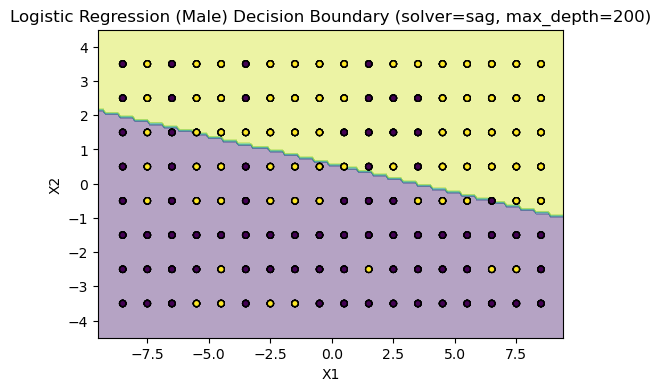

Score : 0.6060606060606061


In [19]:
from sklearn.linear_model import LogisticRegression

def viz_log_m(solver, max_iter):
    log_clf_m = LogisticRegression(solver=solver, max_iter=max_iter, random_state=42).fit(X_train, y_male_train)
    # print(log_clf_m.predict(X_test))
    # print(log_clf_m.predict_proba(X_test))

     # Plotting decision boundary for demonstration (example)
    plt.figure(figsize=(6, 4))
    # ... (code to plot decision boundary or any visualization)
    # Plot decision boundary
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    Z = log_clf_m.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=male_y, s=20, edgecolor='k')
    plt.title(f"Logistic Regression (Male) Decision Boundary (solver={solver}, max_depth={max_iter})")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

    print("Score :", log_clf_m.score(X_test, y_male_test))


viz_log_m('sag', 200)


In [20]:
# Create interactive sliders for hyperparameters
max_iter_m = widgets.IntSlider(min=1,
    max=500,
    step=10,
    value=100,
    description='max_iter')

solver_m = widgets.RadioButtons(options=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], value='lbfgs', description='solver')

log_plot_m = widgets.interact(viz_log_m, solver=solver_m, max_iter=max_iter_m)


interactive(children=(RadioButtons(description='solver', options=('lbfgs', 'liblinear', 'newton-cg', 'newton-c…

In [27]:
from joblib import dump

clf_m = RandomForestClassifier(n_estimators=211, max_depth=31, criterion='gini', random_state=42)
clf_m.fit(X_train, y_male_train)

dump(clf_m, 'rf_m.joblib')

# help(dump)

Help on function dump in module joblib.numpy_pickle:

dump(value, filename, compress=0, protocol=None, cache_size=None)
    Persist an arbitrary Python object into one file.
    
    Read more in the :ref:`User Guide <persistence>`.
    
    Parameters
    -----------
    value: any Python object
        The object to store to disk.
    filename: str, pathlib.Path, or file object.
        The file object or path of the file in which it is to be stored.
        The compression method corresponding to one of the supported filename
        extensions ('.z', '.gz', '.bz2', '.xz' or '.lzma') will be used
        automatically.
    compress: int from 0 to 9 or bool or 2-tuple, optional
        Optional compression level for the data. 0 or False is no compression.
        Higher value means more compression, but also slower read and
        write times. Using a value of 3 is often a good compromise.
        See the notes for more details.
        If compress is True, the compression level use

In [28]:
clf_f = RandomForestClassifier(n_estimators=241, max_depth=14, criterion='gini', random_state=42)
clf_f.fit(X_train, y_female_train)

dump(clf_f, 'rf_f.joblib')

['rf_f.joblib']